# Задача
Необходимо произвести предобработку данных, обучить модели на алгоритмах, рассмотренных в уроках, оценить модели с помощью рассмотренных метрик и объяснить выбор определенной метрики.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://drive.google.com/file/d/1eQXG7q9vgaUpv6ZWN6cp1_AZBs-U4Lsy/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url, index_col=0)
dataset.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


data description file [kagge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Типы данных

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Float данные

In [4]:
#dataset.select_dtypes(include=['number']).dtypes
dataset.select_dtypes(include=['float64']).dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

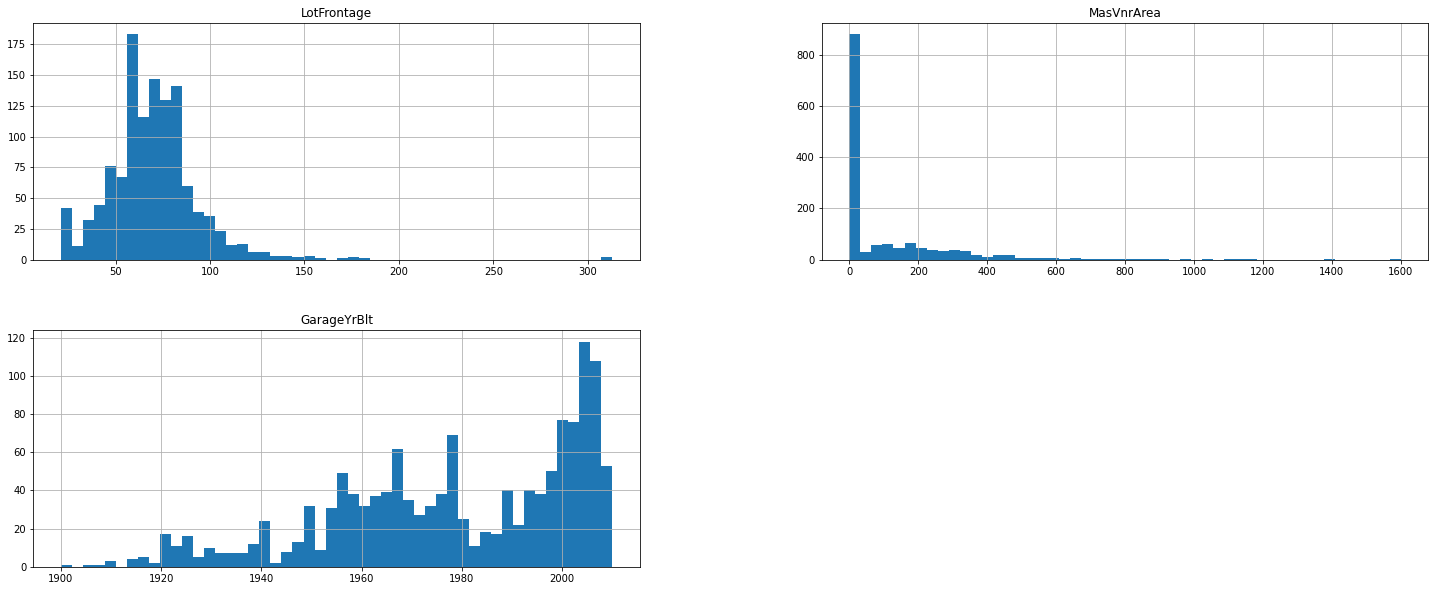

In [5]:
float_attributes = dataset.select_dtypes(include=['float64'])
float_attributes.hist(bins=50,figsize=(25,10));

In [6]:
float_attributes= dataset.select_dtypes(include=['number'])
features_nan=[feature for feature in float_attributes if dataset[feature].isnull().sum()]

for feature in features_nan:
    print(f'пропущенные данные {feature} - {np.round(100*dataset[feature].isnull().mean(),4)} %')

пропущенные данные LotFrontage - 17.7397 %
пропущенные данные MasVnrArea - 0.5479 %
пропущенные данные GarageYrBlt - 5.5479 %


- `LotFrontage` - расстояние до улицы в адресе
- `MasVnrArea` - тут площадь кирпичноой кладки стен
- `GarageYrBlt` - когда гараж построен

In [7]:
dataset['LotFrontage']=dataset['LotFrontage'].fillna(dataset['LotFrontage'].median()) # заполняем медианой
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(0) # заполняем на 0
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna('No_Garage') # заполняем на нет гаража
dataset[features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Int данные

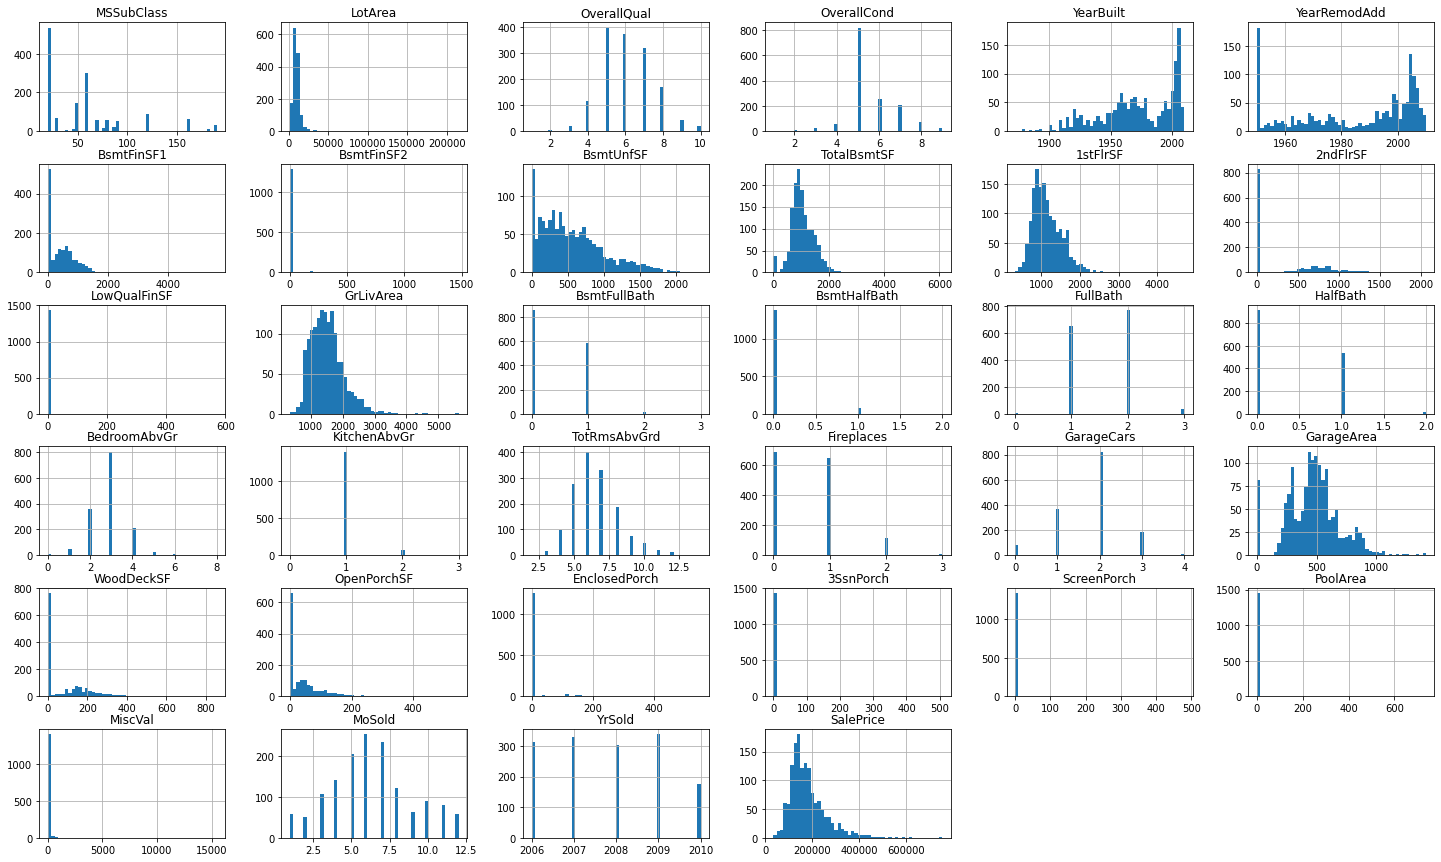

In [8]:
int_attributes = dataset.select_dtypes(include=['int64'])
int_attributes.hist(bins=50,figsize=(25,15));

In [9]:
int_attributes= dataset.select_dtypes(include=['number'])
features_nan=[feature for feature in int_attributes if dataset[feature].isnull().sum()]

for feature in features_nan:
    print(f'пропущенные данные {feature} - {np.round(100*dataset[feature].isnull().mean(),4)} %')

тут пустот нет

### Корреляция в числовых данных

In [10]:
#Посмотрим цифровые данные
#Посмотрим корреляцию
corr_number_data = dataset.select_dtypes(include=['number']).corr()
corr_number_data['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.334771
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

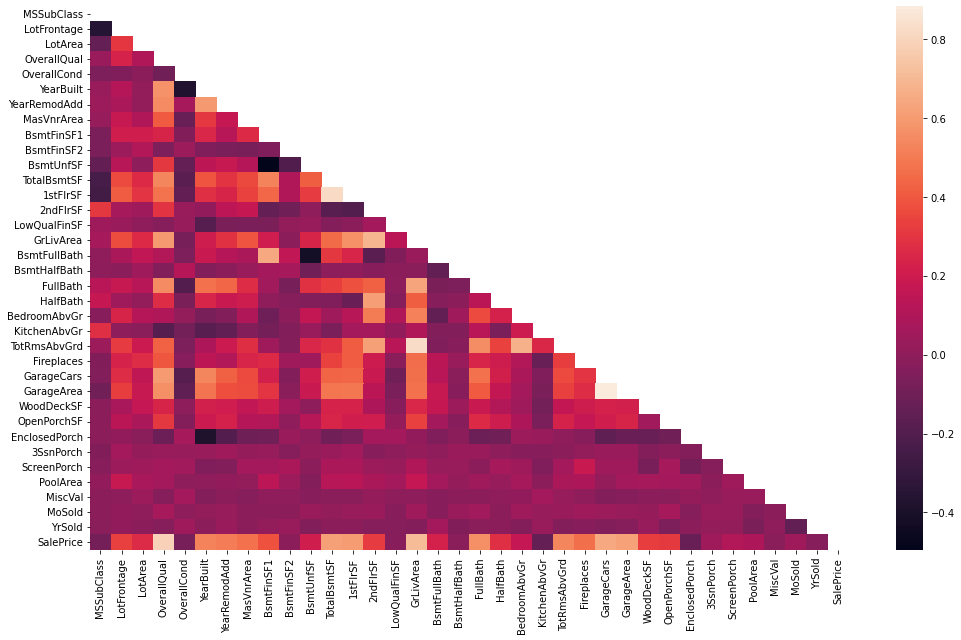

In [11]:
f, ax = plt.subplots(figsize=(17,10))
matrix=np.triu(corr_number_data)
sns.heatmap(corr_number_data,mask=matrix);

#### Убираем излишние

In [12]:
level_corr = 0.7
for fitch in corr_number_data.columns:
  if fitch !='SalePrice':    
     cor_lst = list(corr_number_data[corr_number_data.loc[fitch] > level_corr].index)
     cor_lst.remove(fitch)
     if cor_lst and cor_lst!=['SalePrice']: 
       print(f'Параметр {fitch} коррелирует c {cor_lst} более {100*level_corr}%')

Параметр TotalBsmtSF коррелирует c ['1stFlrSF'] более 70.0%
Параметр 1stFlrSF коррелирует c ['TotalBsmtSF'] более 70.0%
Параметр GrLivArea коррелирует c ['TotRmsAbvGrd', 'SalePrice'] более 70.0%
Параметр TotRmsAbvGrd коррелирует c ['GrLivArea'] более 70.0%
Параметр GarageCars коррелирует c ['GarageArea'] более 70.0%
Параметр GarageArea коррелирует c ['GarageCars'] более 70.0%


- GarageCars коррелирует с  GarageArea
- TotRmsAbvGrd коррелирует с GrLivArea.
- 1stFlrSF коррелирует с TotalBsmtSF

Кроме того

- TotalBsmtSF - Total square feet of basement area.
То есть TotalBsmtSF это сумма BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF

In [13]:
 # Удалим избыточные данные
dataset.drop(dataset[['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars', '1stFlrSF']],axis=1, inplace=True)

In [14]:
corr_number_data = dataset.select_dtypes(include=['number']).corr()
# Слабосвязанные с SalePrice данные 
corr_number_data['SalePrice'].sort_values(ascending=False)[-10:]

3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [15]:
# Сильносвязанные с SalePrice данные 
corr_number_data['SalePrice'].sort_values(ascending=False)[:20]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
Name: SalePrice, dtype: float64

#### Отобранные некоторые select_num_feturs

In [16]:
# отберем основные числовые признаки без SalePrice
select_num_feturs = list(corr_number_data[corr_number_data['SalePrice']>0.30].index)+list(corr_number_data[corr_number_data['SalePrice']<-0.3].index)
select_num_feturs.remove('SalePrice')
select_num_feturs

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

### Нечисловые данные

In [17]:
dataset.select_dtypes(exclude=['number']).dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [18]:
object_attributes = dataset.select_dtypes(include=['object'])
object_attributes = list(object_attributes.columns)

In [19]:
# Посмотрим на распределение категориальных фичей
for col_name in object_attributes:
  print(f'{col_name} Распределение')
  print(dataset[col_name].value_counts())
  print(f'Тип данных {dataset[col_name].dtype}')
  if dataset[col_name].isnull().sum():
     print(f'Есть пропуски в данных_________')
  print()

MSZoning Распределение
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Тип данных object

Street Распределение
Pave    1454
Grvl       6
Name: Street, dtype: int64
Тип данных object

Alley Распределение
Grvl    50
Pave    41
Name: Alley, dtype: int64
Тип данных object
Есть пропуски в данных_________

LotShape Распределение
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Тип данных object

LandContour Распределение
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Тип данных object

Utilities Распределение
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Тип данных object

LotConfig Распределение
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Тип данных object

LandSlope Распределение
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Тип данных object

Neighborhood Распределение
NAmes

In [20]:
features_nan=[feature for feature in object_attributes if dataset[feature].isnull().sum()]

for feature in features_nan:
    print(f'пропущенные данные {feature} - {np.round(100*dataset[feature].isnull().mean(),4)} %')

пропущенные данные Alley - 93.7671 %
пропущенные данные MasVnrType - 0.5479 %
пропущенные данные BsmtQual - 2.5342 %
пропущенные данные BsmtCond - 2.5342 %
пропущенные данные BsmtExposure - 2.6027 %
пропущенные данные BsmtFinType1 - 2.5342 %
пропущенные данные BsmtFinType2 - 2.6027 %
пропущенные данные Electrical - 0.0685 %
пропущенные данные FireplaceQu - 47.2603 %
пропущенные данные GarageType - 5.5479 %
пропущенные данные GarageFinish - 5.5479 %
пропущенные данные GarageQual - 5.5479 %
пропущенные данные GarageCond - 5.5479 %
пропущенные данные PoolQC - 99.5205 %
пропущенные данные Fence - 80.7534 %
пропущенные данные MiscFeature - 96.3014 %


In [21]:
## Заменим пропущенные данные на mode значение
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

## Заменим пропущенные данные в некоторых категориальных данных на типа  'No_...'
dataset['Alley'] = dataset['Alley'].fillna('No_Alley')
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('No_Fireplace')
dataset['PoolQC'] = dataset['PoolQC'].fillna('No_Pool')
dataset['Fence'] = dataset['Fence'].fillna('No_Fence')
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('No_MiscFeature')
dataset['GarageCond'] = dataset['GarageCond'].fillna('No_Garage')
dataset['GarageQual'] = dataset['GarageQual'].fillna('No_Garage')
dataset['GarageType'] = dataset['GarageType'].fillna('No_Garage')
dataset['GarageFinish'] = dataset['GarageFinish'].fillna('No_Garage')

In [22]:
## Заменим остальные пропущенные данные в категориальных данных на 'Missing'
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset, features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

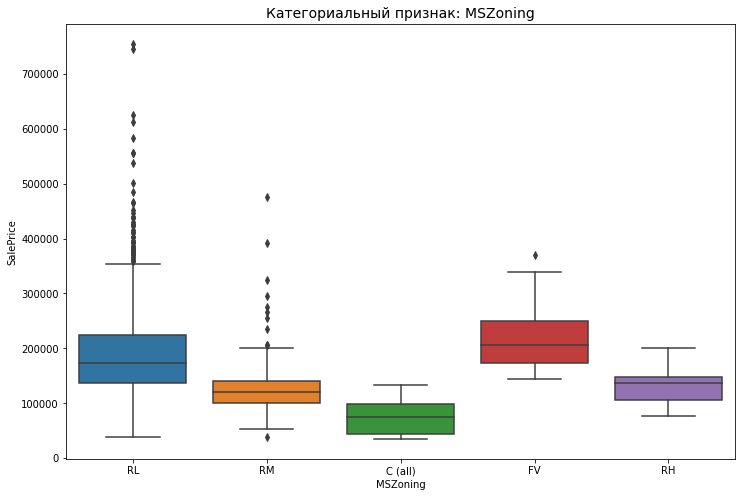

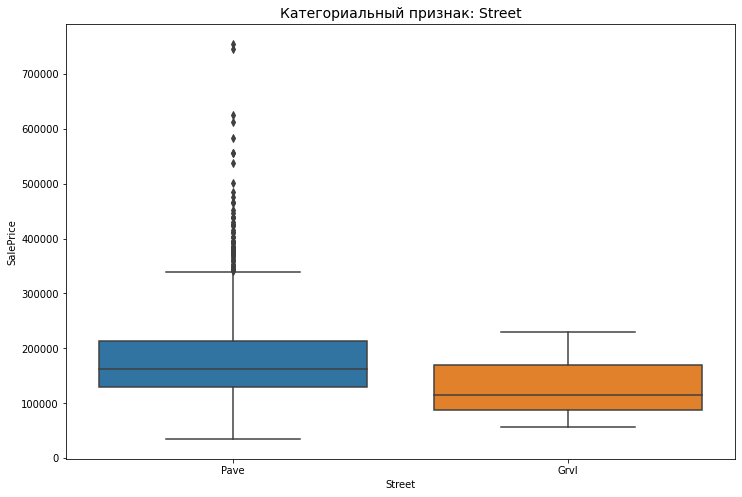

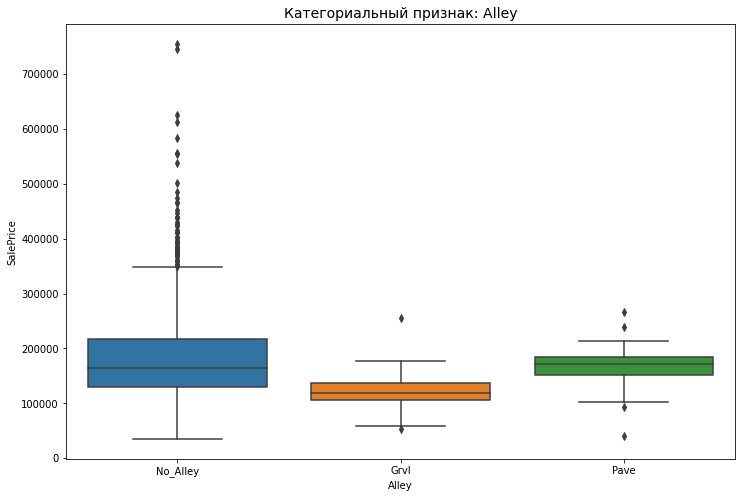

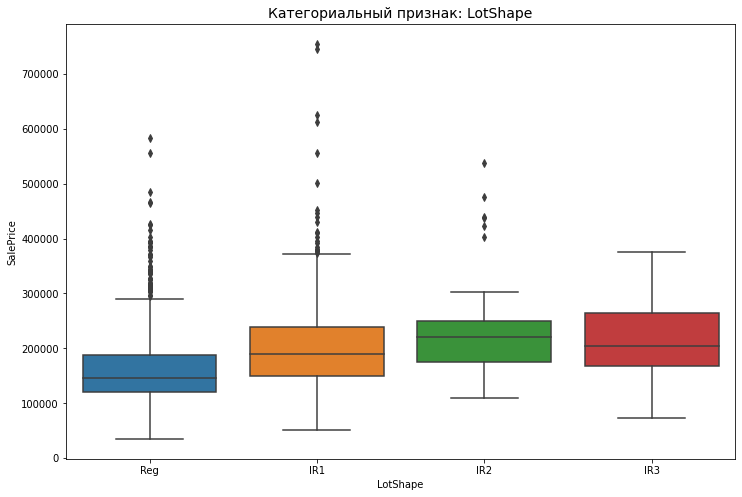

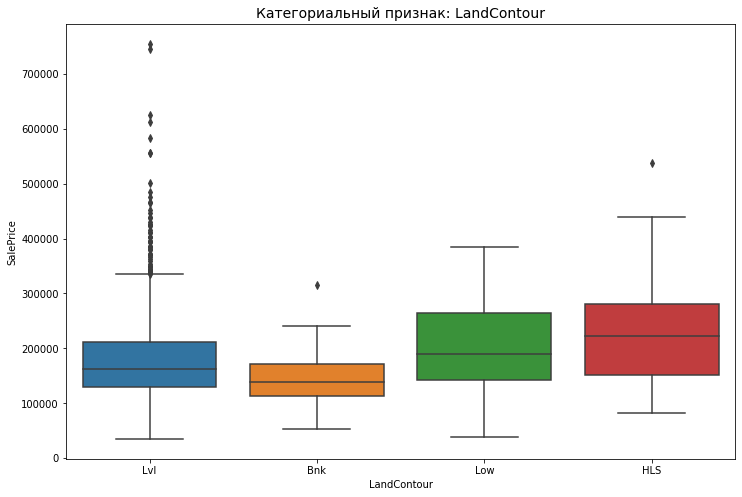

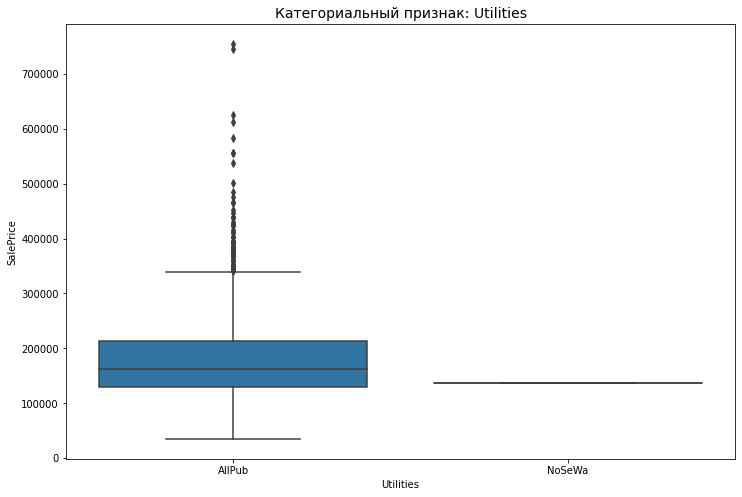

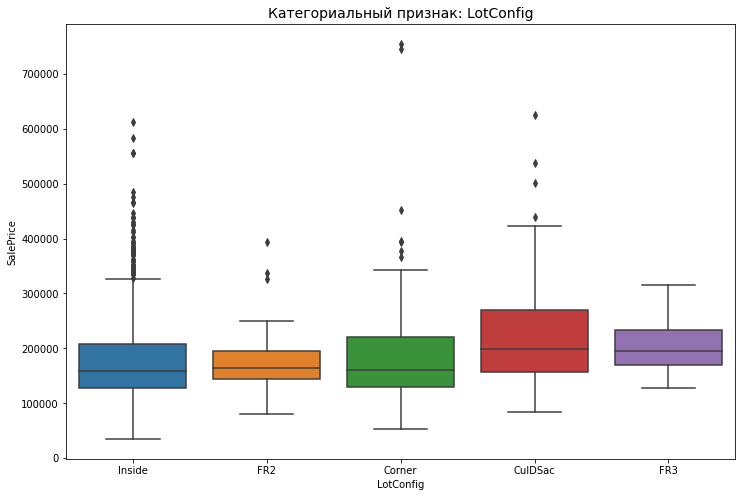

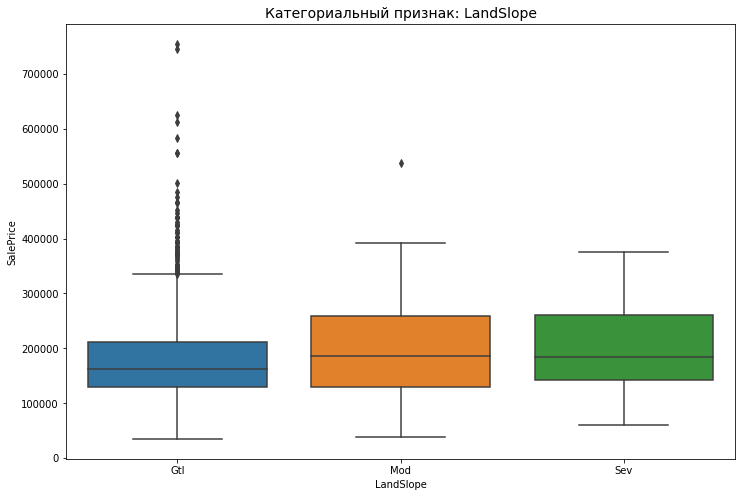

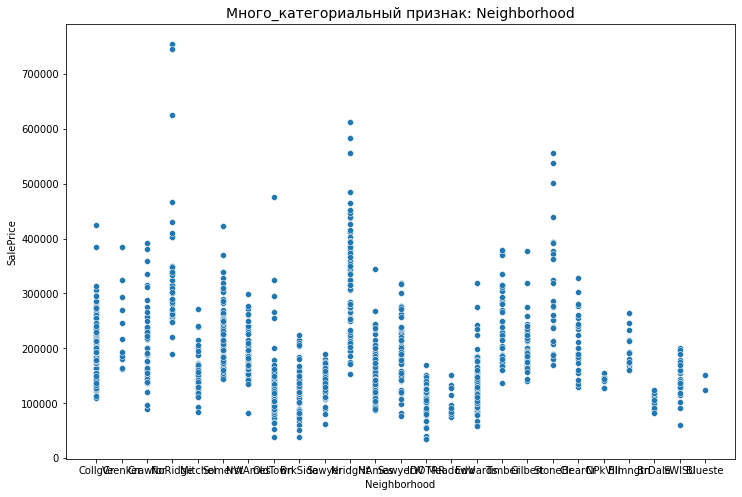

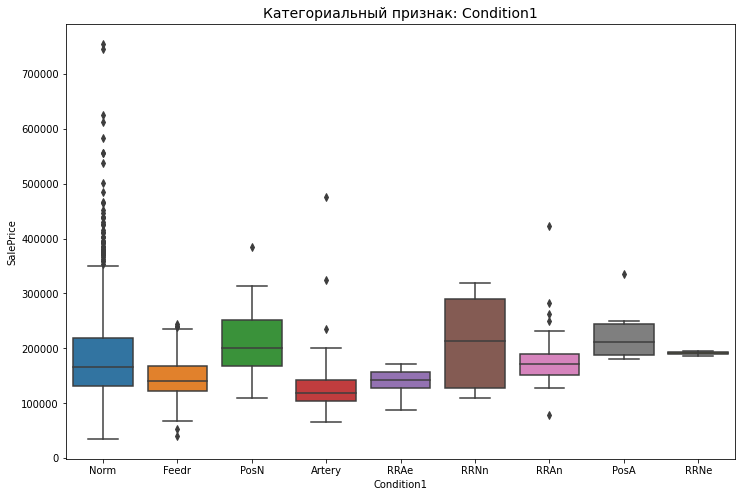

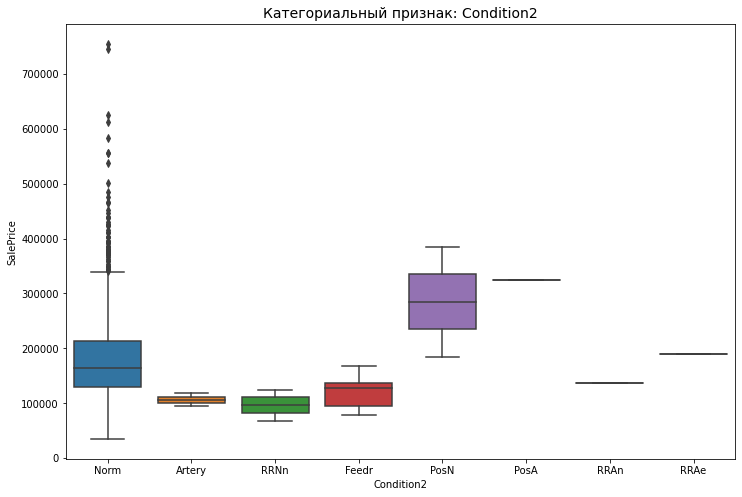

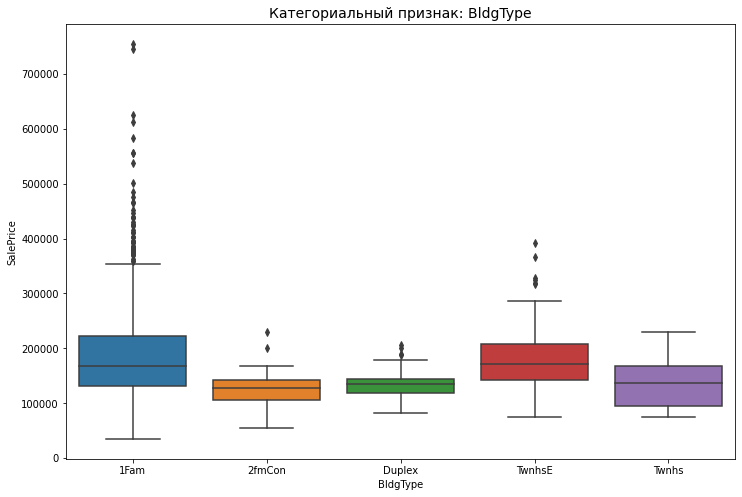

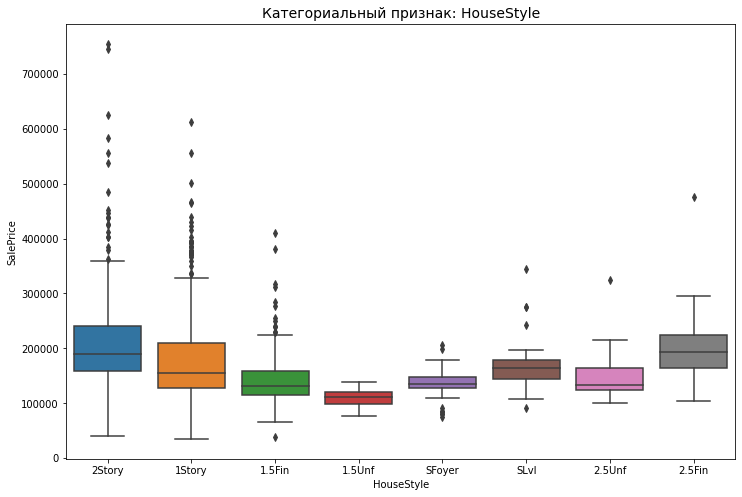

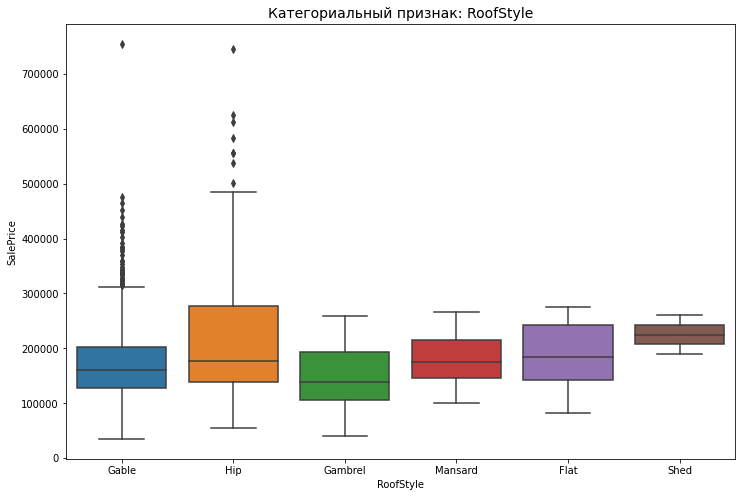

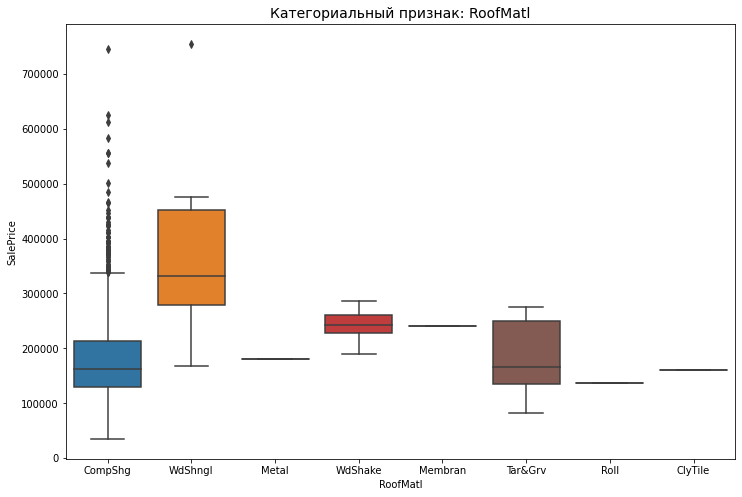

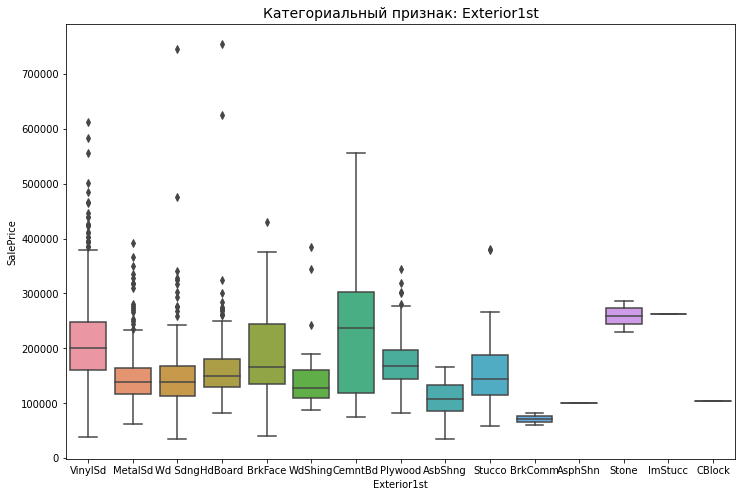

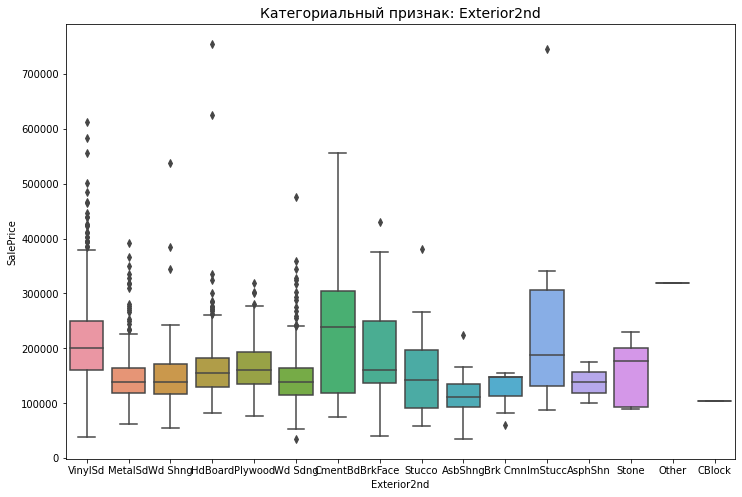

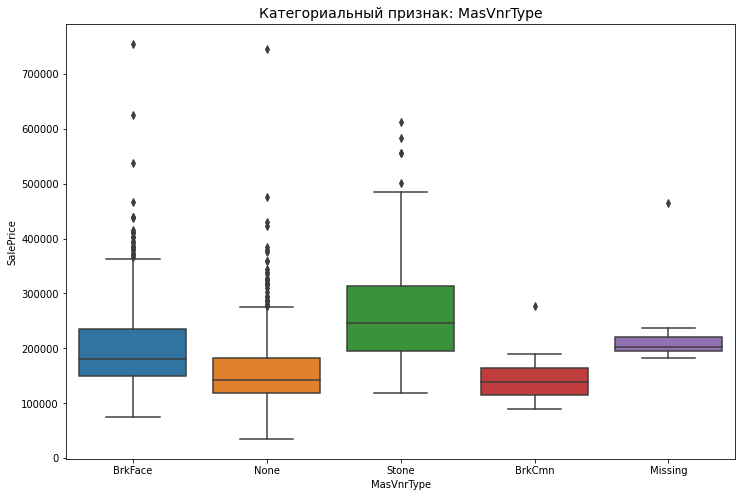

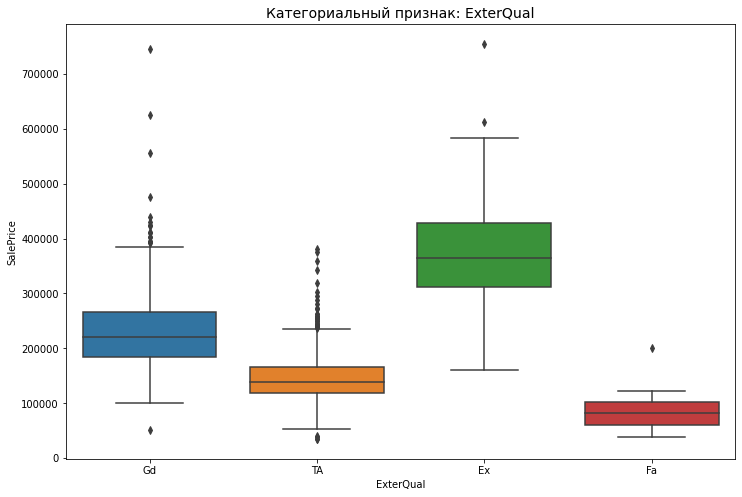

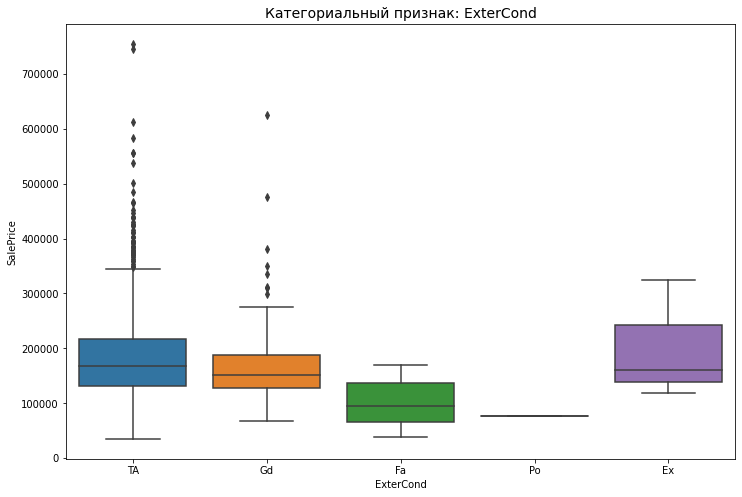

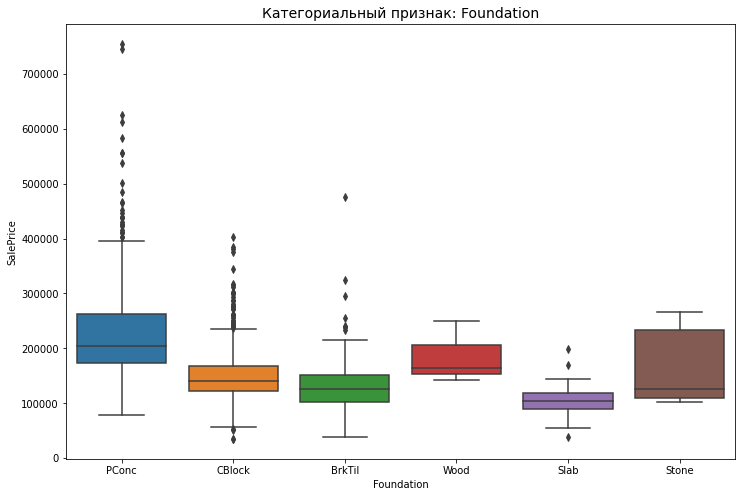

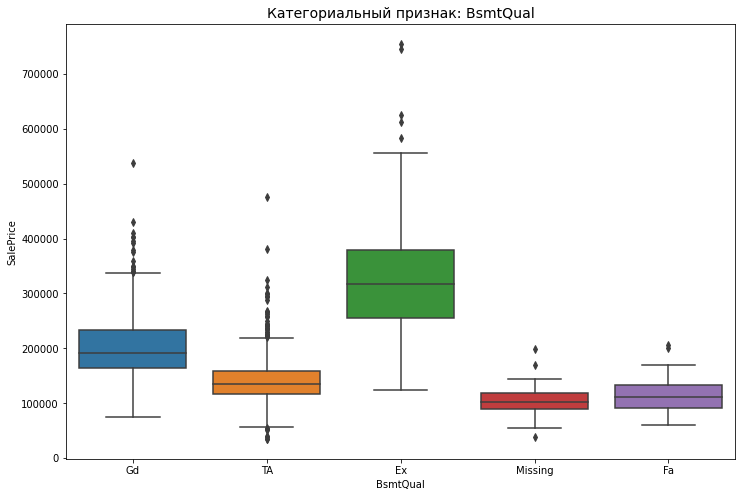

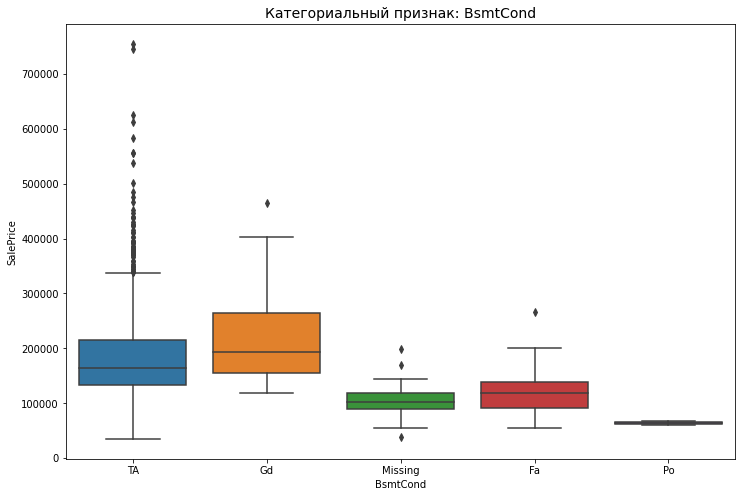

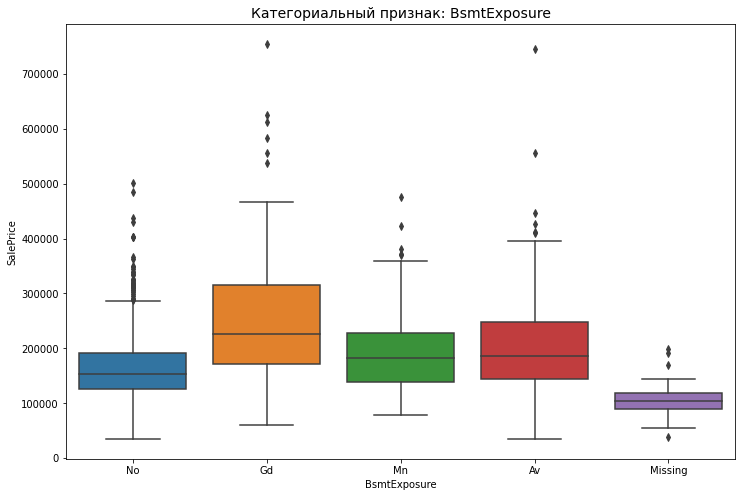

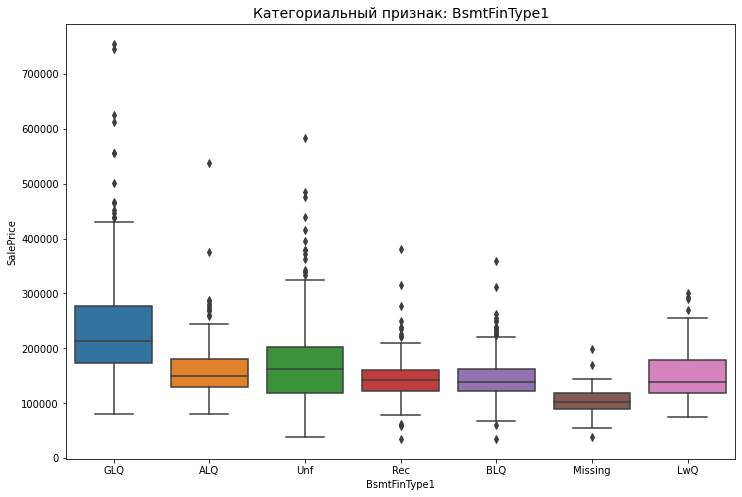

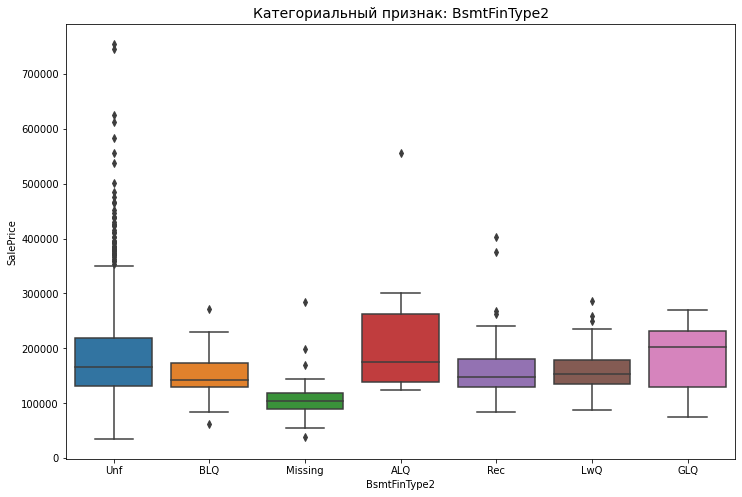

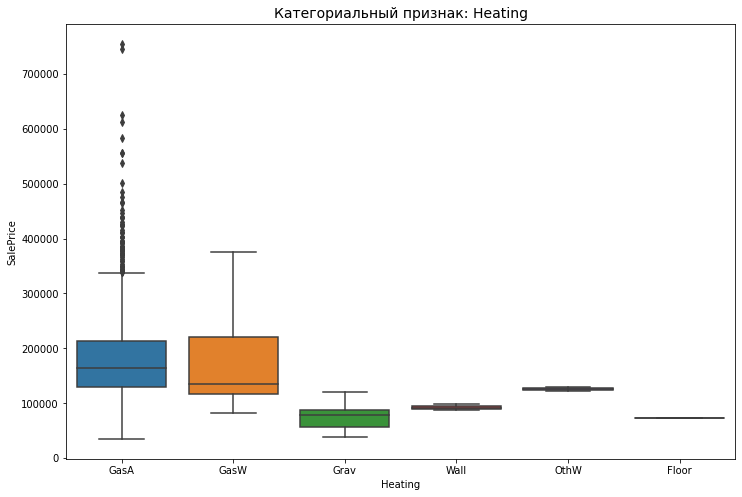

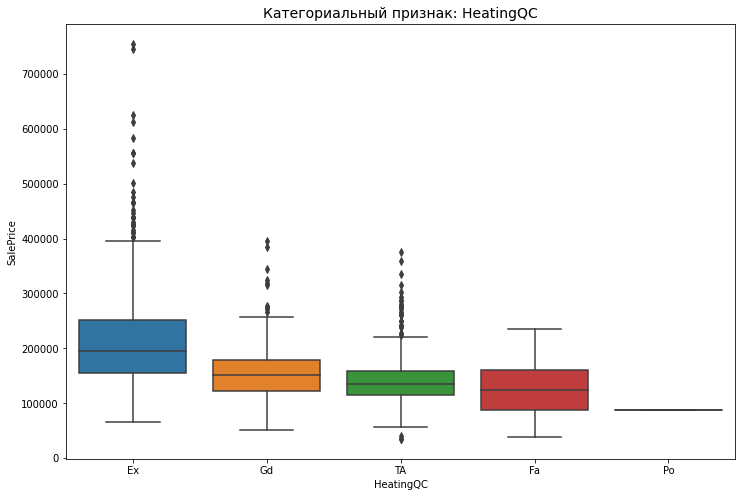

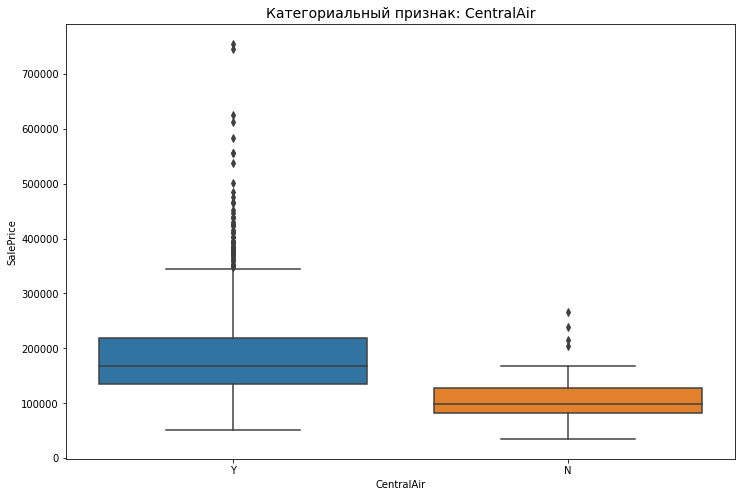

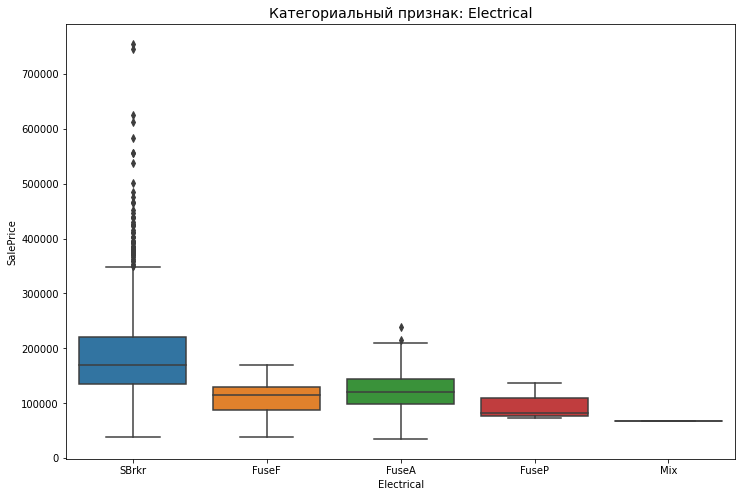

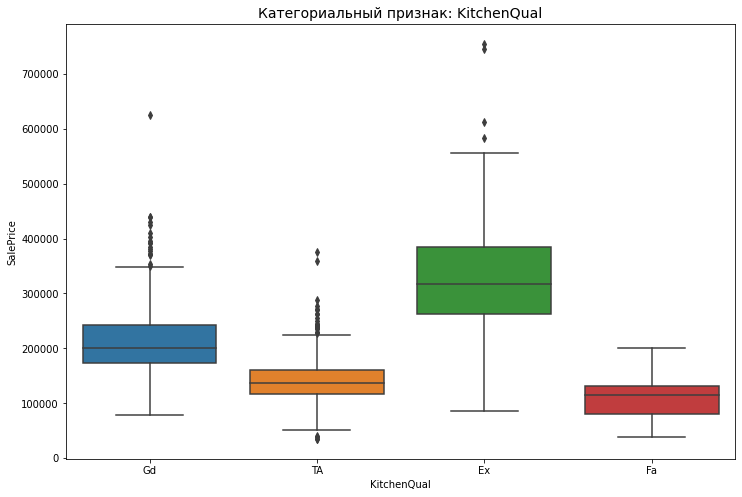

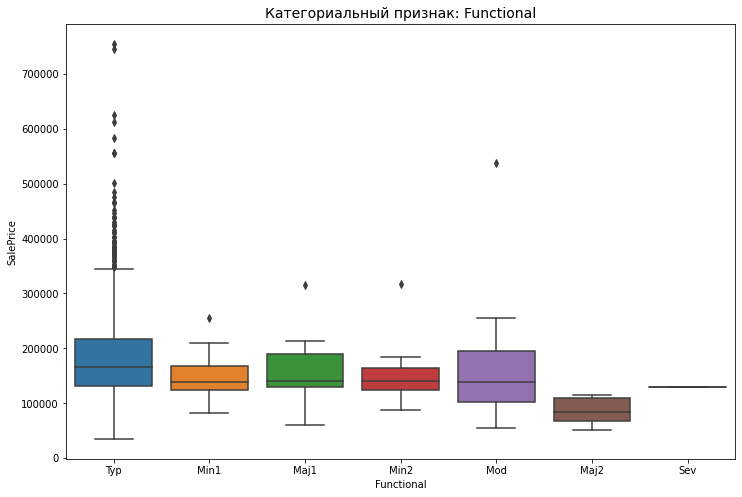

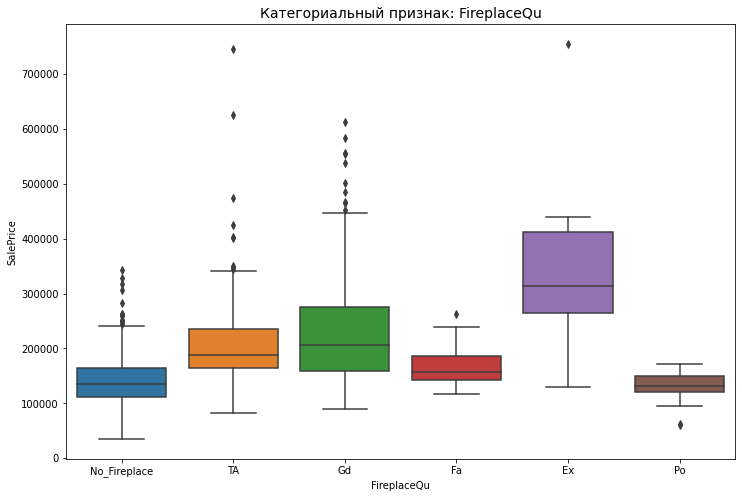

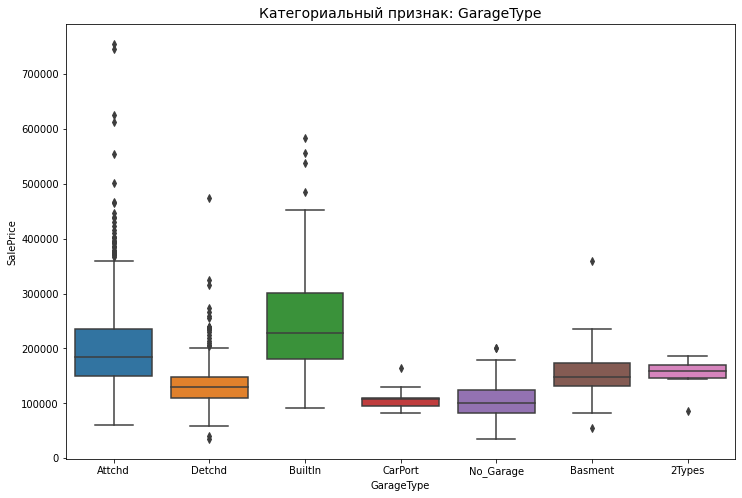

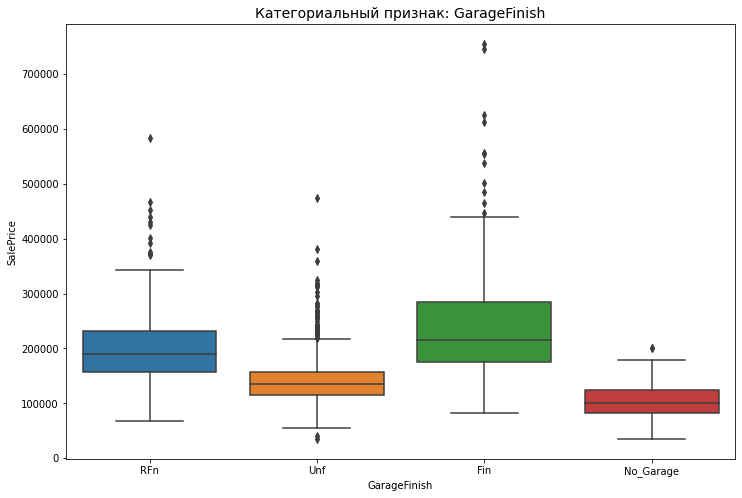

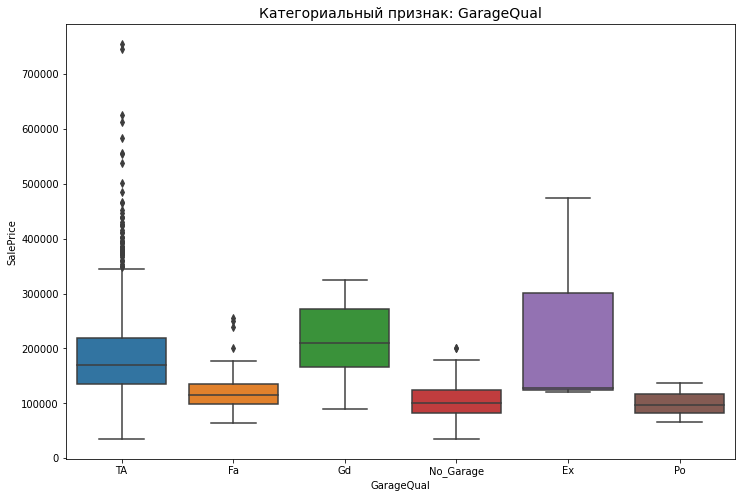

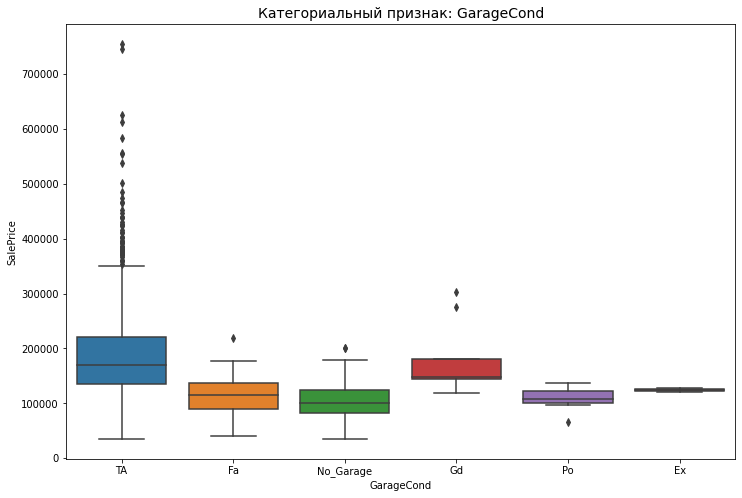

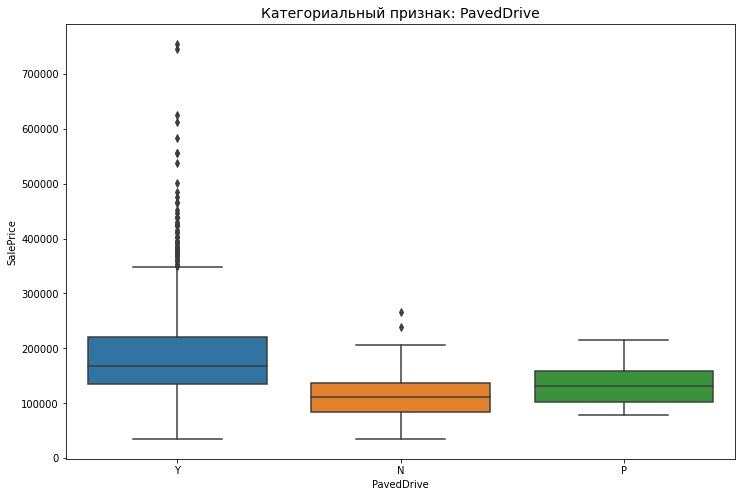

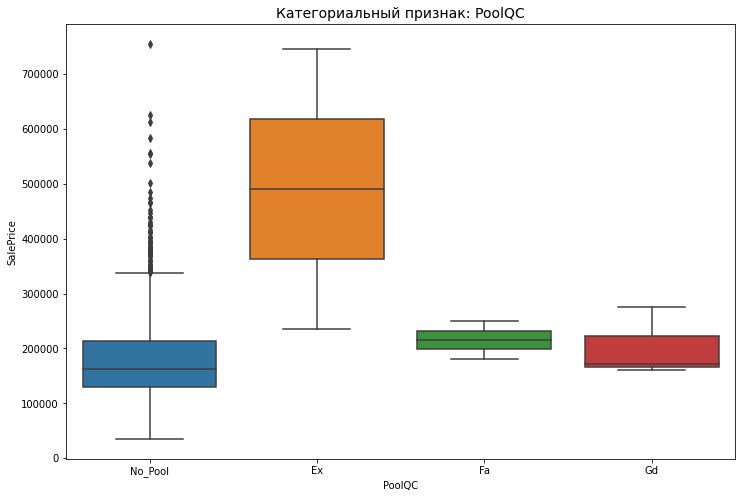

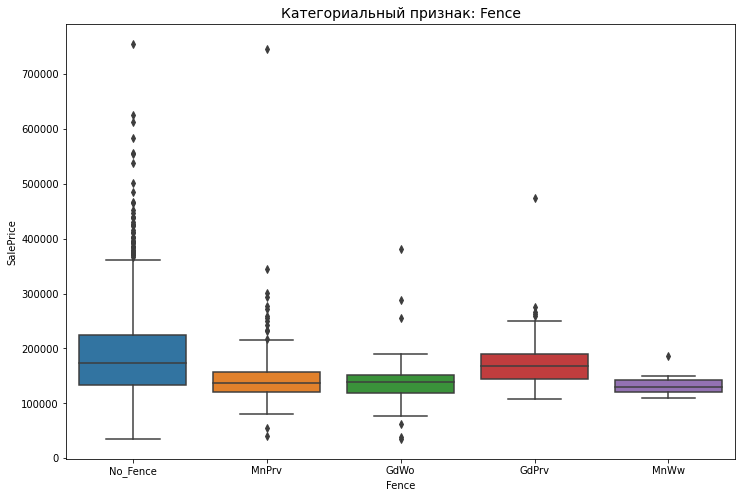

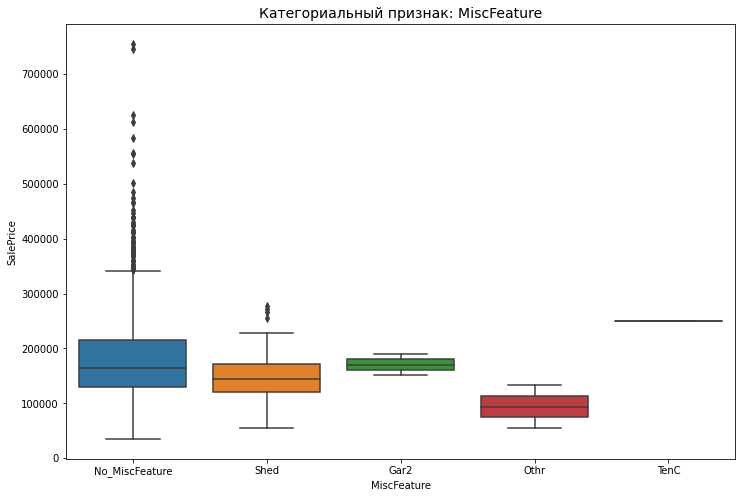

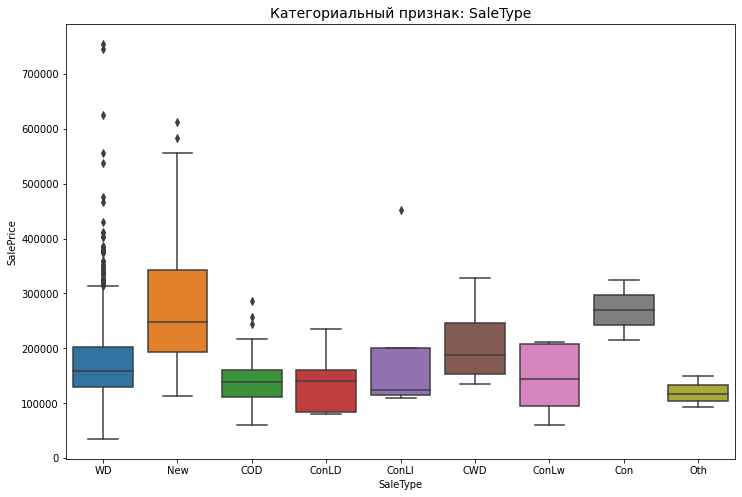

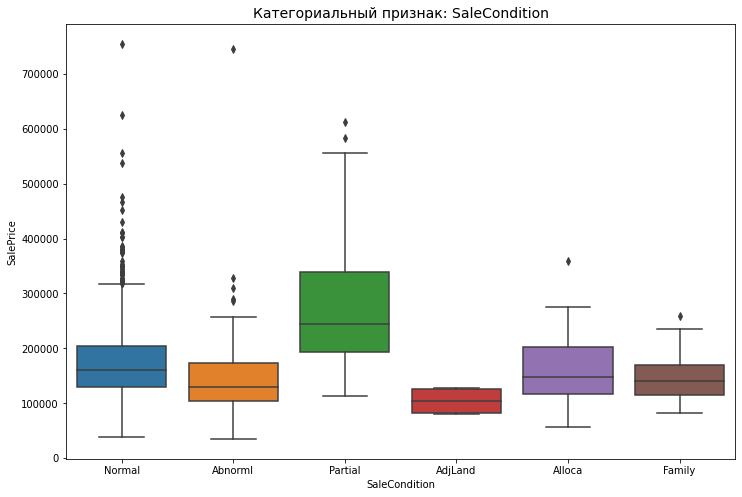

In [23]:
for fitch in object_attributes:
    if fitch !='SalePrice':
      # Категориальные признаки
      if len(dataset[fitch].unique()) <= 20:   
          f, ax = plt.subplots(figsize=(12, 8))
          plt.title(f'Категориальный признак: {fitch}', fontsize=14)
          sns.boxplot(x=fitch, y='SalePrice', data=dataset)
      # Много категориальные признаки
      else:
          f, ax = plt.subplots(figsize=(12, 8))
          plt.title(f'Много_категориальный признак: {fitch}', fontsize=14)
          sns.scatterplot(x=fitch, y='SalePrice', data=dataset)

Присутствуют выбросы в данных, которрые возможно стоит убирать позднее

### Переведем категориальные данные в one_hot

In [24]:
dataset_dummy = pd.get_dummies(dataset, columns=object_attributes, drop_first=True)

# Обучение

## Данные для обучения

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [26]:
y = dataset_dummy.SalePrice
y_log = np.log(y) # растягиваем данне по y
X = dataset_dummy.drop(['SalePrice'], axis=1)

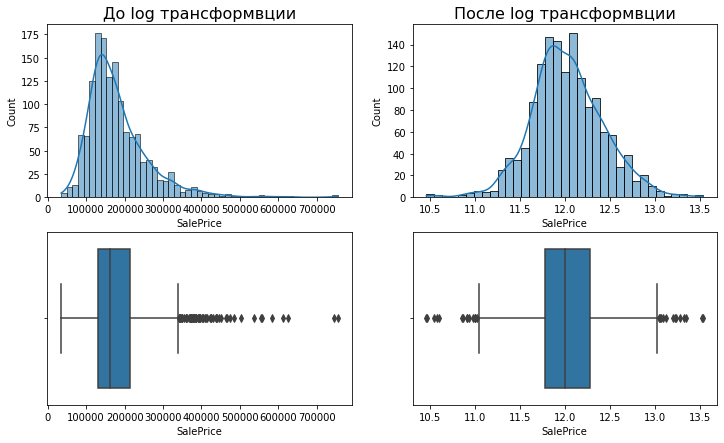

In [27]:
plt.figure(figsize = (12,7))

plt.subplot(221)
plot1=sns.histplot(y, kde=True);
plot1.set_title('До log трансформвции', fontsize=16)

plt.subplot(222)
plot2=sns.histplot(y_log, kde=True);
plot2.set_title('После log трансформвции', fontsize=16)

plt.subplot(223)
sns.boxplot(y);

plt.subplot(224)
sns.boxplot(y_log);

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state=42, test_size=.25)

## Ridge, Lasso, Huber

In [29]:
from sklearn.linear_model import Ridge, Lasso, HuberRegressor
model_ridge = make_pipeline(StandardScaler(), Ridge())
model_lasso = make_pipeline(StandardScaler(), Lasso())
model_huber = make_pipeline(StandardScaler(), HuberRegressor())

model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)
model_huber.fit(X_train, y_train)

print(f'MAE (Ridge): {mean_absolute_error(y_test, model_ridge.predict(X_test))}')
print(f'MAE (Lasso): {mean_absolute_error(y_test, model_lasso.predict(X_test))}')
print(f'MAE (Huber): {mean_absolute_error(y_test, model_huber.predict(X_test))}')
print()
print(f'MAPE_Huber: {mean_absolute_percentage_error(y_test,  model_huber.predict(X_test)):.4f}')
print(f'R^2_Huber: {r2_score(y_test,  model_huber.predict(X_test)):.4f}')

MAE (Ridge): 0.09386092231598446
MAE (Lasso): 0.32386110078709013
MAE (Huber): 0.09410267346581293

MAPE_Huber: 0.0079
R^2_Huber: 0.8370


### Только на [select_num_feturs]

In [30]:
from sklearn.linear_model import Ridge, Lasso, HuberRegressor
model_ridge = make_pipeline(StandardScaler(), Ridge())
model_lasso = make_pipeline(StandardScaler(), Lasso())
model_huber = make_pipeline(StandardScaler(), HuberRegressor())

model_ridge.fit(X_train[select_num_feturs], y_train)
model_lasso.fit(X_train[select_num_feturs], y_train)
model_huber.fit(X_train[select_num_feturs], y_train)

print(f'MAE (Ridge): {mean_absolute_error(y_test, model_ridge.predict(X_test[select_num_feturs]))}')
print(f'MAE (Lasso): {mean_absolute_error(y_test, model_lasso.predict(X_test[select_num_feturs]))}')
print(f'MAE (Huber): {mean_absolute_error(y_test, model_huber.predict(X_test[select_num_feturs]))}')

print()
print(f'MAPE_Huber: {mean_absolute_percentage_error(y_test,  model_huber.predict(X_test[select_num_feturs])):.4f}')
print(f'R^2_Huber: {r2_score(y_test,  model_huber.predict(X_test[select_num_feturs])):.4f}')

MAE (Ridge): 0.11342019502193797
MAE (Lasso): 0.32386110078709013
MAE (Huber): 0.10047470272183362

MAPE_Huber: 0.0085
R^2_Huber: 0.8789


### с PolynomialFeatures

In [31]:
from sklearn.linear_model import Ridge, Lasso, HuberRegressor
model_ridge = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), Ridge())
model_lasso = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), Lasso())
model_huber = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), HuberRegressor())

model_ridge.fit(X_train[select_num_feturs], y_train)
model_lasso.fit(X_train[select_num_feturs], y_train)
model_huber.fit(X_train[select_num_feturs], y_train)

print(f'MAE (Ridge): {mean_absolute_error(y_test, model_ridge.predict(X_test[select_num_feturs]))}')
print(f'MAE (Lasso): {mean_absolute_error(y_test, model_lasso.predict(X_test[select_num_feturs]))}')
print(f'MAE (Huber): {mean_absolute_error(y_test, model_huber.predict(X_test[select_num_feturs]))}')

print()
print(f'MAPE_Huber: {mean_absolute_percentage_error(y_test,  model_huber.predict(X_test[select_num_feturs])):.4f}')
print(f'R^2_Huber: {r2_score(y_test,  model_huber.predict(X_test[select_num_feturs])):.4f}')

MAE (Ridge): 0.11226711302729352
MAE (Lasso): 0.32386110078709013
MAE (Huber): 0.1043139337496529

MAPE_Huber: 0.0088
R^2_Huber: 0.8682


## LinearRegression

In [32]:
logreg = LinearRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [33]:
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print()
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}')
print(f'R^2: {r2_score(y_test, y_pred):.4f}')


MSE: 0.0277
MAE: 0.0936

MAPE: 0.0079
R^2: 0.8398


### Только на [select_num_feturs]

In [34]:
logreg = LinearRegression()

logreg.fit(X_train[select_num_feturs], y_train)
y_pred = logreg.predict(X_test[select_num_feturs])

In [35]:
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print()
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}')
print(f'R^2: {r2_score(y_test, y_pred):.4f}')


MSE: 0.0246
MAE: 0.1135

MAPE: 0.0095
R^2: 0.8581


 ## LinearRegression с PolynomialFeatures

In [36]:
pipeline_logreg = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression(),
)

pipeline_logreg.fit(X_train, y_train)
y_pred = pipeline_logreg.predict(X_test)

In [37]:
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print()
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}')
print(f'R^2: {r2_score(y_test, y_pred):.4f}')


MSE: 0.0253
MAE: 0.1107

MAPE: 0.0093
R^2: 0.8540


### Только на [select_num_feturs]

In [38]:
pipeline_logreg = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression(),
)

pipeline_logreg.fit(X_train[select_num_feturs], y_train)
y_pred = pipeline_logreg.predict(X_test[select_num_feturs])

In [39]:
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print()
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}')
print(f'R^2: {r2_score(y_test, y_pred):.4f}')


MSE: 0.0213
MAE: 0.1021

MAPE: 0.0086
R^2: 0.8768


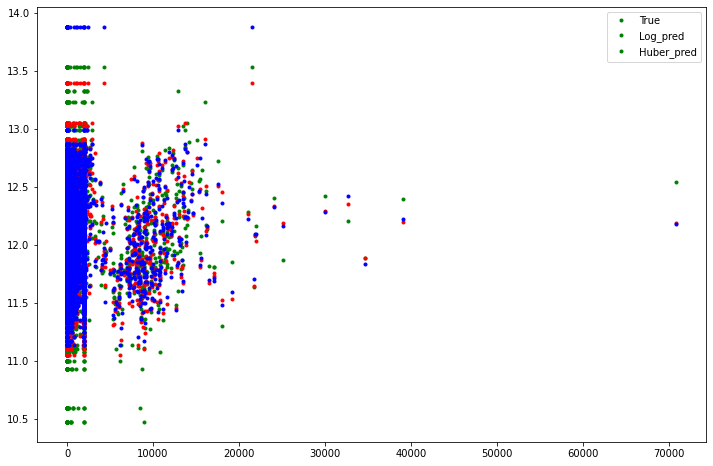

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(X_test, y_test, 'b.', label='True', color='green' );
plt.plot(X_test, y_pred, 'r.', label='Log_pred', color='red');
plt.plot(X_test, model_huber.predict(X_test[select_num_feturs]), 'b.', label='Huber_pred', color='blue');
plt.legend(('True','Log_pred', 'Huber_pred'),  loc=0);

# Выводы

Точность логистической регресии удалось поднять до `0.8768` за счет отбора наиболее влияющих данных из датасета и расширению регресии за счет добавления PolynomialFeatures
Но особенно меня удивил `HuberRegressor`, он при более расширенномнаборе select_num_feturs выдает более `0.88`